In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
import torch
import seaborn as sns
import spacy
import string
import nltk
from nltk import FreqDist
import time
from string import punctuation
from torch.utils.data import DataLoader, TensorDataset
import gc
from tqdm import tqdm

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [3]:
#Read training data (on kaggle)
train = pd.read_csv('Desktop/Toxic/train.csv')
train

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.000000,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [4]:
#Read test data, also from kaggle
test = pd.read_csv('Desktop/Toxic/test.csv')
test

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...
5,7000005,Why can't the Globe & Mail provide the symbols...
6,7000006,"That's already been happening, Carl, it's call..."
7,7000007,"imagine the costs for security, transportation..."
8,7000008,So they want to put United on the board of thi...
9,7000009,"No, no that can't be. It's Russia that's the ..."


In [5]:
#Create and clean the data
all_text = []
test_text = []
word_list = []
reviews_data = train['comment_text']
reviews_test = test['comment_text']
labels_data = train['target']

for review in reviews_data:
    my_sent = ''.join([c for c in review if c not in punctuation]).lower().split()
    word_list += my_sent
    all_text.append(my_sent)
for test_r in reviews_test:
    my_sent = ''.join([c for c in test_r if c not in punctuation]).lower().split()
    word_list += my_sent
    test_text.append(my_sent)
labels = list(labels_data)

In [6]:
#Create a list of all the words
word_dic = {}
review_code = []
test_review_code = []
word_list = set(word_list)
for count, w in enumerate(word_list):
    word_dic[w] = count+1 
for count, review in enumerate(all_text):
    review_code.append([word_dic[w] for w in review])
for count, review in enumerate(test_text):
    test_review_code.append([word_dic[w] for w in review])

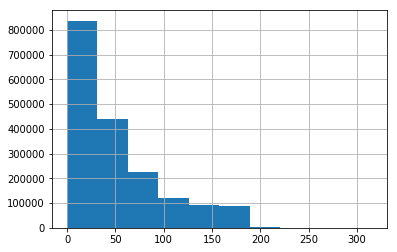

count    1.804874e+06
mean     5.098203e+01
std      4.593095e+01
min      0.000000e+00
25%      1.600000e+01
50%      3.500000e+01
75%      7.100000e+01
max      3.150000e+02
dtype: float64

In [7]:
#See how long each review is
reviews_len = [len(x) for x in review_code]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [8]:
#Take away data where there is no data
review_code = [review_code[i] for i, l in enumerate(reviews_len) if l>0 ] 
labels = [labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [9]:
#Make all comments the same length by padding with 0's
def pad_features(reviews_int, seq_length):
    """ Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    """
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features
my_seq_length = 180
our_features = pad_features(review_code, my_seq_length)
labels = np.array(labels)
test_features = pad_features(test_review_code, my_seq_length)

In [10]:
#Deep Learning Model for toxicity classification. RNN is good for sequential data, like sentences.
class RNN(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(RNN, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = hidden_dim
        self.output_size = output_size
        self.n_layers = n_layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
#        self.gru = nn.GRU(hidden_size, hidden_size)
        self.LSTM = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(.3)
        self.out = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        
    def forward(self, input_sent, hidden):
        batch_size = input_sent.size(dim=0)
        output = self.embedding(input_sent) #.view(1, 1, -1)
        output, hidden = self.LSTM(output, hidden)
        output = output.contiguous().view(-1, self.hidden_dim)
        output = self.dropout(output)
        output = self.out(output)
        output = self.sig(output)
        output = output.view(batch_size,-1)
        output = output[:,-1]
        return output, hidden
        
    def init_hidden(self):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        train_on_gpu = True
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [13]:
#This is where we train and calculate the loss for the function 
def train(inp, target):
    sentiment_optimizer.zero_grad()
    
    ##Initialize hidden layer and set up gradient
    hidden = sentiment.init_hidden()       

    loss = 0
    output, hidden = sentiment(inp, hidden)# run the forward pass of your rnn with proper input
    target = target.type(torch.FloatTensor).cuda()
    loss = criterion(output, target)
    loss.backward()

    sentiment_optimizer.step()
                
    return loss.item()

#Split between the size of the training dataset and the validation dataset
train_split = int(.9*len(our_features))
train_x = our_features[0:train_split]
train_y = labels[0:train_split]
valid_x = our_features[train_split:]
valid_y = labels[train_split:]
test_x = test_features

#Get the data (I don't really use the validation set although I should)
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x),torch.from_numpy(valid_y))

gc.collect()

#YOu can change these values based on the amount of time you have
hidden_dim = 256
n_layers = 2
output_size = 1
embedding_dim = 400
vocab_size = len(word_dic)+1  #because of 0 pad
lr = 0.001
batch_size = 250

#Make sure to shuffle the data
train_loader = DataLoader(train_data, shuffle = True, batch_size = batch_size, pin_memory=True, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle = True, batch_size = batch_size, pin_memory=True, drop_last=True)
 


In [14]:
#Set up model
sentiment = RNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers).cuda()
sentiment_optimizer = torch.optim.Adam(sentiment.parameters(), lr=lr)

#Can Potentially use BCELoss
criterion = nn.MSELoss()

#Values to keep track of model at bottom, use less or more epochs depending on batch size and how much you want to train 
start = time.time()
all_losses = []
avg_loss = []
counter = 1
loss_avg = 0
n_epochs = 6
loop = tqdm(total=len(train_loader)*6, position=0)
 
for epoch in range(1, n_epochs + 1):
    for x, y_truth in train_loader:
        x = x.cuda()
        y_truth = y_truth.cuda()
        my_loss = train(x, y_truth)  
        avg_loss.append(my_loss)
        loop.set_description('loss:{:.4f}'.format(my_loss))
        loop.update(1)
        if counter % 500 == 0:
            all_losses.append(np.mean(avg_loss))
            avg_loss = []
        counter +=1
loop.close()


  0%|          | 0/38976 [00:00<?, ?it/s]

RuntimeError: CUDA out of memory. Tried to allocate 1.03 GiB (GPU 0; 7.93 GiB total capacity; 6.18 GiB already allocated; 964.44 MiB free; 68.34 MiB cached)

In [ ]:
#Show the losses 
plt.plot(all_losses)
plt.show()

In [ ]:
#You can save and load the model like below if you don't want to run again (so only need to run once depending on goals)
#torch.save(sentiment.state_dict(), '/home/mark/RNN_sentiment')
#sentiment.load_state_dict(torch.load('/home/mark/RNN_sentiment'))

## Test Sentiment Analysis

In [ ]:
#You can test here on the test set if you want
batch_size = 1
final_vals = np.zeros(len(test_features))
for i in range(len(test_features)):
    hidden = sentiment.init_hidden()
    test_val = torch.from_numpy(test_features[i]).cuda().unsqueeze(0)
    final_vals[i] = sentiment(test_val, hidden)[0]
    if i % 1000 == 0:
        print(i)